In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import sklearn
from sklearn.model_selection import train_test_split
from random import shuffle
import seaborn as sns  

In [0]:
import matplotlib.pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [0]:
!ls ./drive/My Drive

ls: cannot access './drive/MyDrive': No such file or directory


In [0]:
path="/content/drive/My Drive/yelp_final_data/"

### In this notebook, we segment test set in user and business dimension.

 We separate user and business in three levels: unpopular, midpopuar and popular. The defination of whether a user/business is popular is defined by the frequency of a user/business. The frequency of a user means the number of ratings a users rated before. The frequency of a business means the number of times a business has been rated before. (Note: when we say a 'popular' user, it means a 'prolific' user, we use the term 'popular' for the succinctness of representing these three levels.)

First, read the dataset we prepared before. 

Read the test index we prepared before.

In [0]:
#start_time=time.time()
review=pd.read_csv(path+'review.csv')
del review['text_review']
review['freq_business'] = review.groupby('business_id')['business_id'].transform('count')
review2=review.loc[review['freq_business']>2]
review2['freq_user'] = review2.groupby('user_id')['user_id'].transform('count')
review3=review2.loc[review2['freq_user']>=5]
review3=review3.reset_index()
test_idx=pd.read_csv(path+'all_test_idx_df2.csv')
test_idx=test_idx.rename({'0':'index'},axis=1)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Using the test row index we saved before to get train and test set.

In [0]:
test=review3.loc[review3['index'].isin(test_idx['index'])]
train=review3.loc[~review3['index'].isin(test_idx['index'])]

In [0]:
train.head(3)

,index,user_id,business_id,rating_review,date_review,useful_review,funny_review,cool_review,freq_business,freq_user
0,0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,2013-05-07 04:34:36,6.0,1.0,0.0,183,10
1,1,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,2016-11-09 20:09:03,3.0,0.0,0.0,20,9
2,2,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,2016-05-07 01:21:02,5.0,4.0,5.0,108,336


#### User dimension segmentation

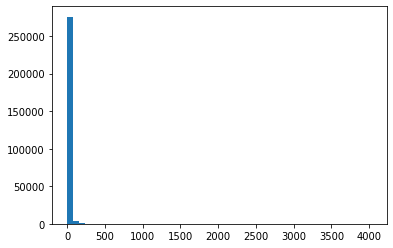

In [0]:
user_freq=train['user_id'].value_counts()
df = pd.DataFrame(user_freq).reset_index()
df.columns = ['userId', 'count']
plt.hist(df['count'],bins=50)
plt.show()

In [0]:
df

,userId,count
0,CxDOIDnH8gp9KXzpBHJYXw,4031
1,bLbSNkLggFnqwNNzzq-Ijw,2335
2,PKEzKWv_FktMm2mGPjwd0Q,1808
3,ELcQDlf69kb-ihJfxZyL0A,1754
4,DK57YibC5ShBmqQl97CKog,1715
...,...,...
281360,PRGMs30FB1F_Lbsk1tWRxw,2
281361,crwcqmGOSNrftAQTqGHifg,2
281362,EWJ3FnnEZi2bWnylCFgMrg,2
281363,SWWfnUz0daoVCN6kJds_9w,2


Check the median and mean of the frequency of users

In [0]:
df['count'].median()

5.0

In [0]:
df['count'].mean()

12.85909761342029

The number of users who rated more than 5 times.

In [0]:
len(df.loc[df['count']>5])

138076

The number of users who rated less or equal to 5 times.

In [0]:
len(df.loc[df['count']<=5])

143289

The number of users who rated between 5 and 13 times.

In [0]:
len(df.loc[(df['count']<=13)&(5<df['count'])])

78897

The number of users who rated more than 13 times.

In [0]:
len(df.loc[df['count']>13])

59179

For users who rated less than 5 times, we see them as unpopular/unprolific users. (Note: this does not mean that the users rated less than 5 times in the overall dataset, for here, 'less than 5 times' means 'less than 5 times' in the train set. In the overall dataset, we already exclude the users who rated less than 5 times as inactive users).

In [0]:
unpopular_user_ID=(df.loc[df['count']<=5])['userId']

In [0]:
unpopular_user_ID=pd.DataFrame(unpopular_user_ID)

In [0]:
unpopular_user_ID.to_csv(path+'unpopular_user_ID.csv',index=False)

In [0]:
pd.read_csv(path+'unpopular_user_ID.csv')

,userId
0,1ULNqf9IbFiso1cBdcTX0A
1,502dJKA0kyc2bKsyjCniEw
2,GvKJKd3tBEeWmp0PWBGQ3w
3,0_KCK9S9j5FhlY0Duf6Lrw
4,_CMcr0_ylU9fZ6BMCmw0iQ
...,...
143284,PRGMs30FB1F_Lbsk1tWRxw
143285,crwcqmGOSNrftAQTqGHifg
143286,EWJ3FnnEZi2bWnylCFgMrg
143287,SWWfnUz0daoVCN6kJds_9w


For users who rated between 5 and 13 times, we see them as midpopular users. 5 and 13 are decided by the median and mean of the frequency.

In [0]:
midpopular_user_ID=(df.loc[(df['count']<=13)&(5<df['count'])])['userId']
midpopular_user_ID=pd.DataFrame(midpopular_user_ID)
midpopular_user_ID.to_csv(path+'midpopular_user_ID.csv',index=False)

For users who rated between more than 13 times, we see them as popular/prolific users.

In [0]:
popular_user_ID=(df.loc[df['count']>13])['userId']
popular_user_ID=pd.DataFrame(popular_user_ID)
popular_user_ID.to_csv(path+'popular_user_ID.csv',index=False)

#### Business dimension segmentation

Same logic applies here.

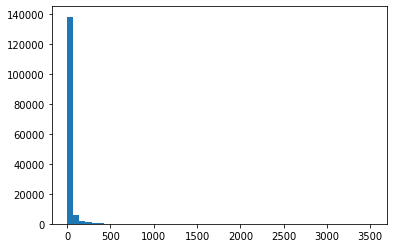

In [0]:
business_freq=train['business_id'].value_counts()
df = pd.DataFrame(business_freq).reset_index()
df.columns = ['businessId', 'count']
plt.hist(df['count'],bins=50)
plt.show()

In [0]:
df['count']

0         3514
1         3323
2         2901
3         2636
4         2342
          ... 
148838       1
148839       1
148840       1
148841       1
148842       1
Name: count, Length: 148843, dtype: int64

Check the median and the mean of the frequency.

In [0]:
df['count'].median()

7.0

In [0]:
df['count'].mean()

24.308163635508556

The number business that has been rated less or equal to 7 times.

In [0]:
len(df.loc[df['count']<=7])

76229

In [0]:
A=df.loc[df['count']<=7]

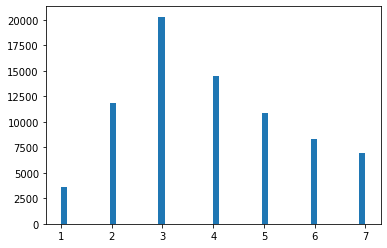

In [0]:
plt.hist(A['count'],bins=50)
plt.show()

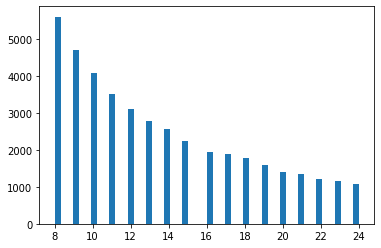

In [0]:
plt.hist((df.loc[(df['count']>7)&(df['count']<=24)])['count'],bins=50)
plt.show()

The number business that has been rated between 7 and 24 times.

In [0]:
len(df.loc[(df['count']>7)&(df['count']<=24)])

41929

The number business that has been rated more than 24 times.

In [0]:
len(df.loc[df['count']>24])

30685

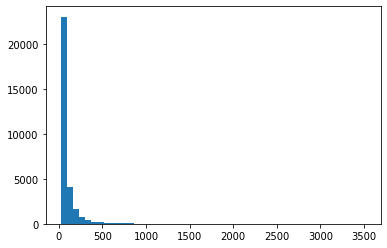

In [0]:
plt.hist((df.loc[df['count']>24])['count'],bins=50)
plt.show()

1. For business that has been rated less or equal to 7 times, we see them as unpopular businesses. 
2. For business that has been rated between 7 and 24 times, we see them as midpopular businesses. 
3. For business that has been rated more than 24 times, we see them as popular businesses. 

Note:7 and 24 are decided by the median and mean of the frequency.

In [0]:
unpopular_business_ID=(df.loc[df['count']<=7])['businessId']
unpopular_business_ID=pd.DataFrame(unpopular_business_ID)
unpopular_business_ID.to_csv(path+'unpopular_business_ID.csv',index=False)

In [0]:
midpopular_business_ID=(df.loc[(df['count']>7)&(df['count']<=24)])['businessId']
midpopular_business_ID=pd.DataFrame(midpopular_business_ID)
midpopular_business_ID.to_csv(path+'midpopular_business_ID.csv',index=False)

In [0]:
popular_business_ID=(df.loc[df['count']>24])['businessId']
popular_business_ID=pd.DataFrame(popular_business_ID)
popular_business_ID.to_csv(path+'popular_business_ID.csv',index=False)